<a href="https://colab.research.google.com/github/Sumitmeharwade/dengAI/blob/main/DengAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import warnings
warnings.filterwarnings('ignore')

suppresing the text above graph

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mp
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

importing the necessary libarary

In [4]:
!git clone https://github.com/Sumitmeharwade/dengAI.git

Cloning into 'dengAI'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 28 (delta 4), reused 7 (delta 0), pack-reused 0
Unpacking objects: 100% (28/28), 4.14 MiB | 3.05 MiB/s, done.


In [5]:
df_f=pd.read_csv('/content/dengAI/DataSets/dengue_features_train.csv')
df_l = pd. read_csv('/content/dengAI/DataSets/dengue_labels_train.csv')



Importing the datasets

In [6]:
df_f.shape

(1456, 24)

In [7]:
df_l.shape

(1456, 4)

In [8]:
df = pd.merge(df_f,df_l,on=('city','weekofyear','year'),how='outer')
df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


Merging the two datasets based upon city,weekofyear and year

In [9]:
pd.concat([df.head(),df.tail()])

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1
1455,iq,2010,25,2010-06-25,0.298186,0.232971,0.274214,0.315757,63.22,298.097143,...,89.082857,63.22,17.355714,11.014286,27.475000,9.900000,33.7,22.2,20.4,4


In [10]:
df.shape

(1456, 25)

In [11]:
df.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,...,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000,1456.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,...,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360,24.675137
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,...,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314,43.596000
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,...,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000,5.000000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,...,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000,12.000000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,...,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000,28.000000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000,461.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

**Information of Tuples with NULL values **

In [13]:
df.isnull().sum()


city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

Check the count of null values in each column

In [14]:
df.duplicated().sum()

0

In [15]:
dfsj=df[df['city']=='sj']
dfiq=df[df['city']=='iq']


Splitting of datasets according to city

In [16]:
dfsj.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [17]:
dfiq.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
936,iq,2000,26,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,...,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0,0
937,iq,2000,27,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,...,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6,0
938,iq,2000,28,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,...,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1,0
939,iq,2000,29,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,...,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0,0
940,iq,2000,30,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,...,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0,0


In [18]:
def dengAIinfo():
   temp=pd.DataFrame(index=dfsj.columns)
   temp["datatype"]=dfsj.dtypes
   temp["not null values"]=dfsj.count()
   temp["null value"]=dfsj.isnull().sum()
   temp["% of the null value"]=dfsj.isnull().mean()*100
   temp["unique count"]=dfsj.nunique()
   return temp
dengAIinfo()


,datatype,not null values,null value,% of the null value,unique count
city,object,936,0,0.000000,1
year,int64,936,0,0.000000,19
weekofyear,int64,936,0,0.000000,53
week_start_date,object,936,0,0.000000,936
ndvi_ne,float64,745,191,20.405983,701
ndvi_nw,float64,887,49,5.235043,857
ndvi_se,float64,917,19,2.029915,896
ndvi_sw,float64,917,19,2.029915,890
precipitation_amt_mm,float64,927,9,0.961538,678
reanalysis_air_temp_k,float64,930,6,0.641026,795


Info on the dataset regarding null values of San Jaun

In [19]:
def dengAIinfo():
  temp=pd.DataFrame(index=dfiq.columns)
  temp["datatype"]=dfiq.dtypes
  temp["not null values"]=dfiq.count()
  temp["null value"]=dfiq.isnull().sum()
  temp["% of the null value"]=dfiq.isnull().mean()*100
  temp["unique count"]=dfiq.nunique()
  return temp
dengAIinfo()

,datatype,not null values,null value,% of the null value,unique count
city,object,520,0,0.000000,1
year,int64,520,0,0.000000,11
weekofyear,int64,520,0,0.000000,53
week_start_date,object,520,0,0.000000,520
ndvi_ne,float64,517,3,0.576923,516
ndvi_nw,float64,517,3,0.576923,513
ndvi_se,float64,517,3,0.576923,512
ndvi_sw,float64,517,3,0.576923,510
precipitation_amt_mm,float64,516,4,0.769231,499
reanalysis_air_temp_k,float64,516,4,0.769231,477


Info on the dataset regarding null values of Liquitos

In [20]:
dfsj.shape

(936, 25)

In [21]:
dfiq.shape

(520, 25)

In [22]:
dfsj=dfsj[dfsj['ndvi_se'].notna()]
dfiq=dfiq[dfiq['ndvi_se'].notna()]


Removing the rows which have null values of the coloumn 'ndvi_se' , it is observed that null values in many columns have been significantly reduced.
22 rows have been removed.

In [23]:
dfsj.shape

(917, 25)

In [24]:
dfiq.shape

(517, 25)

In [25]:
df[(df['ndvi_nw'] <-1) | (df['ndvi_nw']>1)]


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases


The ndvi values should be between -1 and 1 , no rows have nvdi values <-1 or >1

In [26]:
sj_mean_avg_temp = round(dfsj[~dfsj['reanalysis_avg_temp_k'].isnull()]['reanalysis_avg_temp_k'].mean(),6)
sj_mean_station_avg_temp_c = round(dfsj[~dfsj['station_avg_temp_c'].isnull()]['station_avg_temp_c'].mean(),6)
sj_mean_station_max_temp_c = round(dfsj[~dfsj['station_max_temp_c'].isnull()]['station_max_temp_c'].mean(),6)
sj_mean_station_min_temp_c = round(dfsj[~dfsj['station_min_temp_c'].isnull()]['station_min_temp_c'].mean(),6)
sj_mean_ndvi_ne = round(dfsj[~dfsj['ndvi_ne'].isnull()]['ndvi_ne'].mean(),6)
sj_mean_ndvi_nw = round(dfsj[~dfsj['ndvi_nw'].isnull()]['ndvi_nw'].mean(),6)
sj_mean_reanalysis_air_temp_k = round(dfsj[~dfsj['reanalysis_air_temp_k'].isnull()]['reanalysis_air_temp_k'].mean(),6)
sj_mean_station_diur_temp_rng_c = round(dfsj[~dfsj['station_diur_temp_rng_c'].isnull()]['station_diur_temp_rng_c'].mean(),6)
sj_mean_relative_humidity_percent = round(dfsj[~dfsj['reanalysis_relative_humidity_percent'].isnull()]['reanalysis_relative_humidity_percent'].mean(),6)

iq_mean_avg_temp = round(dfiq[~dfiq['reanalysis_avg_temp_k'].isnull()]['reanalysis_avg_temp_k'].mean(),6)
iq_mean_station_avg_temp_c = round(dfiq[~dfiq['station_avg_temp_c'].isnull()]['station_avg_temp_c'].mean(),6)
iq_mean_station_max_temp_c = round(dfiq[~dfiq['station_max_temp_c'].isnull()]['station_max_temp_c'].mean(),6)
iq_mean_station_min_temp_c = round(dfiq[~dfiq['station_min_temp_c'].isnull()]['station_min_temp_c'].mean(),6)
iq_mean_ndvi_ne = round(dfiq[~dfiq['ndvi_ne'].isnull()]['ndvi_ne'].mean(),6)
iq_mean_ndvi_nw = round(dfiq[~dfiq['ndvi_nw'].isnull()]['ndvi_nw'].mean(),6)
iq_mean_reanalysis_air_temp_k = round(dfiq[~dfiq['reanalysis_air_temp_k'].isnull()]['reanalysis_air_temp_k'].mean(),6)
iq_mean_station_diur_temp_rng_c = round(dfiq[~dfiq['station_diur_temp_rng_c'].isnull()]['station_diur_temp_rng_c'].mean(),6)
iq_mean_relative_humidity_percent = round(dfiq[~dfiq['reanalysis_relative_humidity_percent'].isnull()]['reanalysis_relative_humidity_percent'].mean(),6)




sj_median_precip_amt_kg_per_m2 = round(dfsj[~dfsj['reanalysis_precip_amt_kg_per_m2'].isnull()]['reanalysis_precip_amt_kg_per_m2'].median(),6)
sj_median_sat_precip_amt_mm = round(dfsj[~dfsj['reanalysis_sat_precip_amt_mm'].isnull()]['reanalysis_sat_precip_amt_mm'].median(),6)
sj_median_specific_humidity = round(dfsj[~dfsj['reanalysis_specific_humidity_g_per_kg'].isnull()]['reanalysis_specific_humidity_g_per_kg'].median(),6)
sj_median_station_precip_mm = round(dfsj[~dfsj['station_precip_mm'].isnull()]['station_precip_mm'].median(),6)
sj_median_precipitation_amt_mm = round(dfsj[~dfsj['precipitation_amt_mm'].isnull()]['precipitation_amt_mm'].median(),6)
sj_median_reanalysis_dew_point_temp_k = round(dfsj[~dfsj['reanalysis_dew_point_temp_k'].isnull()]['reanalysis_dew_point_temp_k'].median(),6)
sj_median_reanalysis_max_air_temp_k = round(dfsj[~dfsj['reanalysis_max_air_temp_k'].isnull()]['reanalysis_max_air_temp_k'].median(),6)
sj_median_reanalysis_min_air_temp_k = round(dfsj[~dfsj['reanalysis_min_air_temp_k'].isnull()]['reanalysis_min_air_temp_k'].median(),6)
sj_median_reanalysis_tdtr_k = round(dfsj[~dfsj['reanalysis_tdtr_k'].isnull()]['reanalysis_tdtr_k'].median(),6)

iq_median_precip_amt_kg_per_m2 = round(dfiq[~dfiq['reanalysis_precip_amt_kg_per_m2'].isnull()]['reanalysis_precip_amt_kg_per_m2'].median(),6)
iq_median_sat_precip_amt_mm = round(dfiq[~dfiq['reanalysis_sat_precip_amt_mm'].isnull()]['reanalysis_sat_precip_amt_mm'].median(),6)
iq_median_specific_humidity = round(dfiq[~dfiq['reanalysis_specific_humidity_g_per_kg'].isnull()]['reanalysis_specific_humidity_g_per_kg'].median(),6)
iq_median_station_precip_mm = round(dfiq[~dfiq['station_precip_mm'].isnull()]['station_precip_mm'].median(),6)
iq_median_precipitation_amt_mm = round(dfiq[~dfiq['precipitation_amt_mm'].isnull()]['precipitation_amt_mm'].median(),6)
iq_median_reanalysis_dew_point_temp_k = round(dfiq[~dfiq['reanalysis_dew_point_temp_k'].isnull()]['reanalysis_dew_point_temp_k'].median(),6)
iq_median_reanalysis_max_air_temp_k = round(dfiq[~dfiq['reanalysis_max_air_temp_k'].isnull()]['reanalysis_max_air_temp_k'].median(),6)
iq_median_reanalysis_min_air_temp_k = round(dfiq[~dfiq['reanalysis_min_air_temp_k'].isnull()]['reanalysis_min_air_temp_k'].median(),6)
iq_median_reanalysis_tdtr_k = round(dfiq[~dfiq['reanalysis_tdtr_k'].isnull()]['reanalysis_tdtr_k'].median(),6)

The missing values are filled after analyzing their normal distribution graph

In [27]:
dfsj['reanalysis_avg_temp_k'].fillna(value=sj_mean_avg_temp,inplace=True)
dfsj['station_max_temp_c'].fillna(value=sj_mean_station_max_temp_c,inplace=True)
dfsj['station_avg_temp_c'].fillna(value=sj_mean_station_avg_temp_c,inplace=True)
dfsj['station_min_temp_c'].fillna(value=sj_mean_station_min_temp_c,inplace=True)
dfsj['ndvi_ne'].fillna(value=sj_mean_ndvi_ne,inplace=True)
dfsj['ndvi_nw'].fillna(value=sj_mean_ndvi_nw,inplace=True)
dfsj['reanalysis_air_temp_k'].fillna(value=sj_mean_reanalysis_air_temp_k,inplace=True)
dfsj['station_diur_temp_rng_c'].fillna(value=sj_mean_station_diur_temp_rng_c,inplace=True)
dfsj['reanalysis_relative_humidity_percent'].fillna(value=sj_mean_relative_humidity_percent,inplace=True)

dfiq['reanalysis_avg_temp_k'].fillna(value=iq_mean_avg_temp,inplace=True)
dfiq['station_avg_temp_c'].fillna(value=iq_mean_station_avg_temp_c,inplace=True)
dfiq['station_max_temp_c'].fillna(value=iq_mean_station_max_temp_c,inplace=True)
dfiq['station_min_temp_c'].fillna(value=iq_mean_station_min_temp_c,inplace=True)
dfiq['ndvi_ne'].fillna(value=iq_mean_ndvi_ne,inplace=True)
dfiq['ndvi_nw'].fillna(value=iq_mean_ndvi_nw,inplace=True)
dfiq['reanalysis_air_temp_k'].fillna(value=iq_mean_reanalysis_air_temp_k,inplace=True)
dfiq['station_diur_temp_rng_c'].fillna(value=iq_mean_station_diur_temp_rng_c,inplace=True)
dfiq['reanalysis_relative_humidity_percent'].fillna(value=iq_mean_relative_humidity_percent,inplace=True)



dfsj['station_precip_mm'].fillna(value=sj_median_station_precip_mm,inplace=True)
dfsj['precipitation_amt_mm'].fillna(value=sj_median_precipitation_amt_mm,inplace=True)
dfsj['reanalysis_dew_point_temp_k'].fillna(value=sj_median_reanalysis_dew_point_temp_k,inplace=True)
dfsj['reanalysis_max_air_temp_k'].fillna(value=sj_median_reanalysis_max_air_temp_k,inplace=True)
dfsj['reanalysis_min_air_temp_k'].fillna(value=sj_median_reanalysis_min_air_temp_k,inplace=True)
dfsj['reanalysis_precip_amt_kg_per_m2'].fillna(value=sj_median_precip_amt_kg_per_m2,inplace=True)
dfsj['reanalysis_sat_precip_amt_mm'].fillna(value=sj_median_sat_precip_amt_mm,inplace=True)
dfsj['reanalysis_specific_humidity_g_per_kg'].fillna(value=sj_median_specific_humidity,inplace=True)
dfsj['reanalysis_tdtr_k'].fillna(value=sj_median_reanalysis_tdtr_k,inplace=True)


dfiq['station_precip_mm'].fillna(value=iq_median_station_precip_mm,inplace=True)
dfiq['precipitation_amt_mm'].fillna(value=iq_median_precipitation_amt_mm,inplace=True)
dfiq['reanalysis_dew_point_temp_k'].fillna(value=iq_median_reanalysis_dew_point_temp_k,inplace=True)
dfiq['reanalysis_max_air_temp_k'].fillna(value=iq_median_reanalysis_max_air_temp_k,inplace=True)
dfiq['reanalysis_min_air_temp_k'].fillna(value=iq_median_reanalysis_min_air_temp_k,inplace=True)
dfiq['reanalysis_precip_amt_kg_per_m2'].fillna(value=iq_median_precip_amt_kg_per_m2,inplace=True)
dfiq['reanalysis_sat_precip_amt_mm'].fillna(value=iq_median_sat_precip_amt_mm,inplace=True)
dfiq['reanalysis_specific_humidity_g_per_kg'].fillna(value=iq_median_specific_humidity,inplace=True)
dfiq['reanalysis_tdtr_k'].fillna(value=iq_median_reanalysis_tdtr_k,inplace=True)

In [28]:
dfsj[dfsj.isnull()['reanalysis_avg_temp_k']]

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases


In [29]:
df=pd.concat([dfsj,dfiq])
df

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


## **Univarient Analysis**

In [30]:
df.shape

(1434, 25)

<Figure size 1000x600 with 0 Axes>

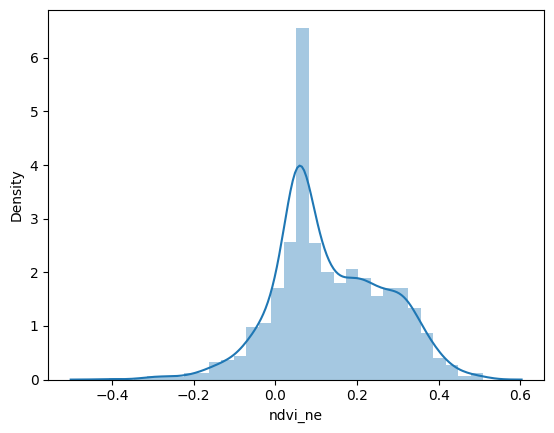

<Figure size 1000x600 with 0 Axes>

In [31]:
sns.distplot(df['ndvi_ne'])
plt.figure(figsize=(10, 6))

In [32]:
# sns.distplot(df['ndvi_nw'])
# plt.figure(figsize=(10, 6))

In [33]:
# sns.distplot(df['ndvi_se'])
# plt.figure(figsize=(10, 6))

In [34]:
# sns.distplot(df['ndvi_sw'])
# plt.figure(figsize=(10, 6))

In [35]:
# sns.distplot(df['precipitation_amt_mm'])
# plt.figure(figsize=(10, 6))

In [36]:
# sns.distplot(df['reanalysis_air_temp_k'])
# plt.figure(figsize=(10, 6))

In [37]:
# sns.distplot(df['reanalysis_avg_temp_k'])
# plt.figure(figsize=(10, 6))

In [38]:
# sns.distplot(df['reanalysis_dew_point_temp_k'])
# plt.figure(figsize=(10, 6))

In [39]:
# sns.distplot(df['reanalysis_max_air_temp_k'])
# plt.figure(figsize=(10, 6))

In [40]:
# sns.distplot(df['reanalysis_min_air_temp_k'])
# plt.figure(figsize=(10, 6))

In [41]:
# sns.distplot(df['reanalysis_precip_amt_kg_per_m2'])
# plt.figure(figsize=(10, 6))

In [42]:
# sns.distplot(df['reanalysis_relative_humidity_percent'])
# plt.figure(figsize=(10, 6))

In [43]:
# sns.distplot(df['reanalysis_sat_precip_amt_mm'])
# plt.figure(figsize=(10, 6))

In [44]:
# sns.distplot(df['reanalysis_specific_humidity_g_per_kg'])
# plt.figure(figsize=(10, 6))

In [45]:
# sns.distplot(df['reanalysis_tdtr_k'])
# plt.figure(figsize=(10, 6))

In [46]:
# df['reanalysis_tdtr_k'].mean()
# plt.figure(figsize=(10, 6))

In [47]:
df['reanalysis_tdtr_k'].median()

2.87142857143

In [48]:
# sns.distplot(df['station_avg_temp_c'])
# plt.figure(figsize=(10, 6))

In [49]:
# sns.distplot(df['station_diur_temp_rng_c'])
# plt.figure(figsize=(10, 6))

In [50]:
# sns.distplot(df['station_max_temp_c'])
# plt.figure(figsize=(10, 6))

In [51]:
# sns.distplot(df['station_min_temp_c'])
# plt.figure(figsize=(10, 6))

In [52]:
# sns.distplot(df['station_precip_mm'])
# plt.figure(figsize=(10, 6))

In [53]:
# sns.distplot(df['total_cases'])
# plt.figure(figsize=(10, 6))

<Figure size 1300x600 with 0 Axes>

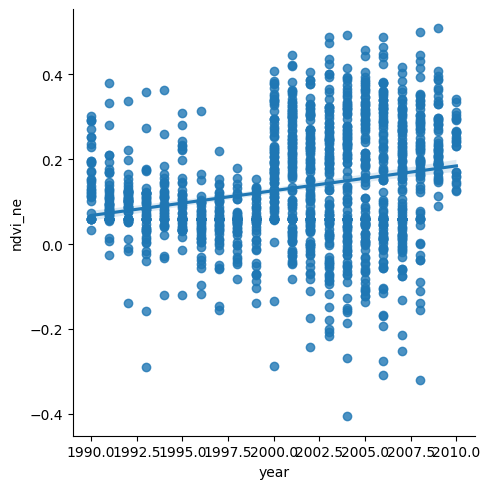

In [54]:
#ns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(13, 6))
sns.lmplot(y='ndvi_ne',x='year',data=df)


In [55]:
[dfsj['total_cases'].sum(),dfiq['total_cases'].sum()]

[27299, 3913]

In [56]:
plt.figure(figsize=(10, 6))
fig = px.line(df, x='week_start_date', y='total_cases',color='city')
fig.show()

<Figure size 1000x600 with 0 Axes>

It is observed that the dengue cases in San Jaun starts early 90's but the cases in Liquitos starts in 2000

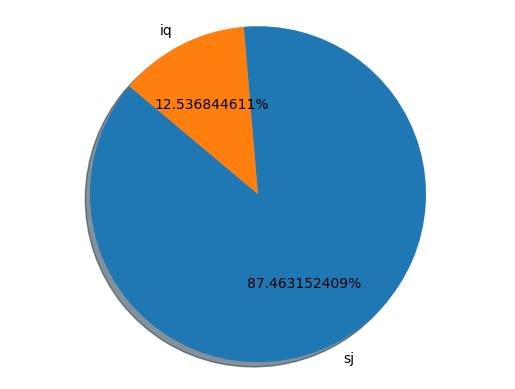

In [57]:
plt.pie([dfsj['total_cases'].sum(),dfiq['total_cases'].sum()], labels=['sj','iq'],
        autopct='%0.9f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()


The percentage of cases in Liquitos is less than the number of cases in San Jaun

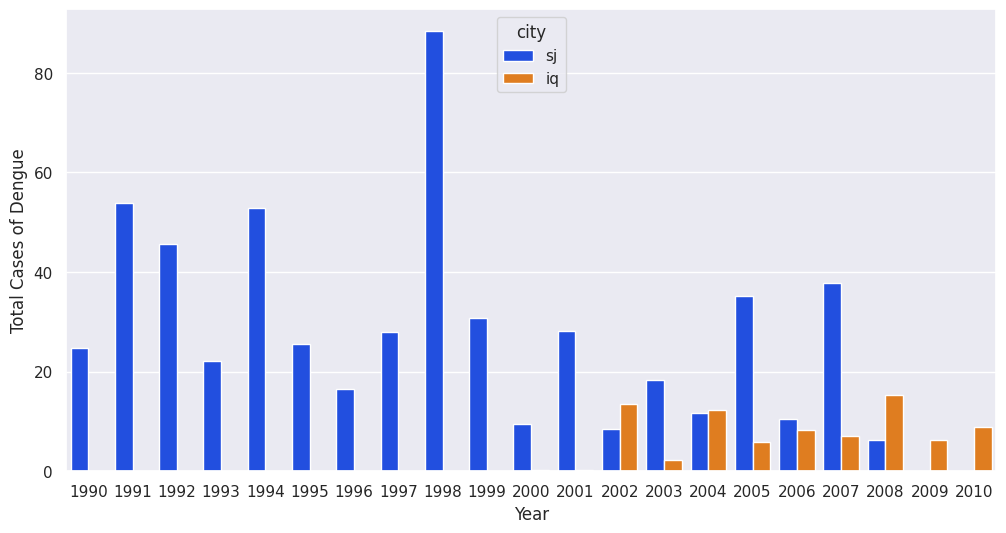

In [58]:
#number of cases per year
sns.set(style="darkgrid", palette="bright")
plt.figure(figsize=(12,6))
sns.barplot(x='year', y='total_cases', hue='city', ci=None, data=df)
plt.xlabel('Year')
plt.ylabel('Total Cases of Dengue');

Comparision of dengue cases with respect to both the cities for every year

<Axes: xlabel='weekofyear', ylabel='total_cases'>

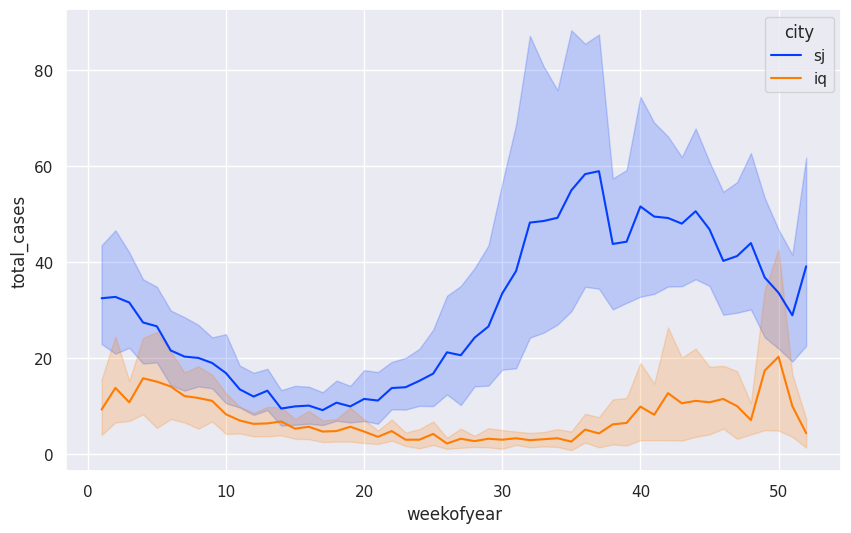

In [59]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='weekofyear', y='total_cases', data=df, hue='city')

San jaun cases are always more than Liquitos

<Axes: xlabel='week_start_date'>

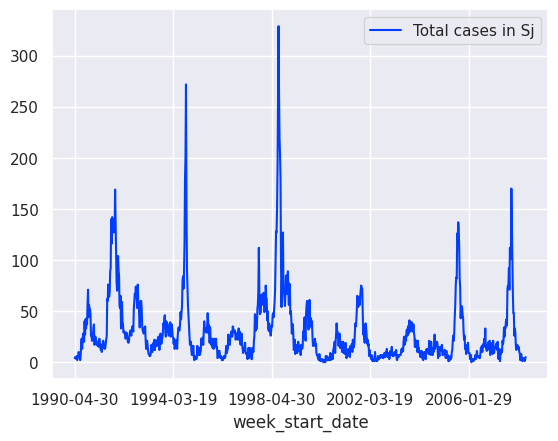

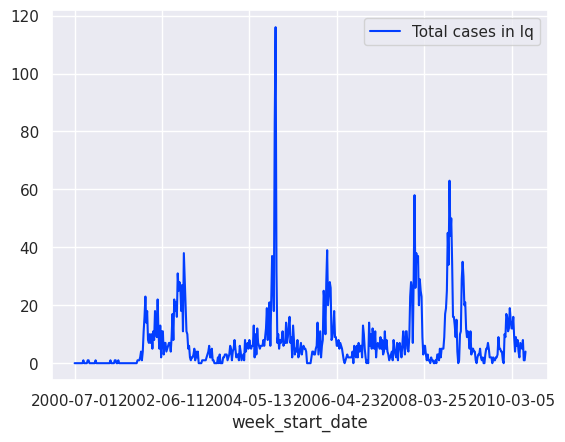

In [60]:
dfsj.plot(x='week_start_date',y='total_cases',label="Total cases in Sj")
dfiq.plot(x='week_start_date',y='total_cases',label="Total cases in Iq")


In [61]:
# def bargraphy(df, x_column, y_column, title):#######
#     plt.bar(df[x_column], df[y_column])
#     plt.xlabel(x_column)
#     plt.ylabel(y_column)
#     plt.title(title)
#     plt.show()

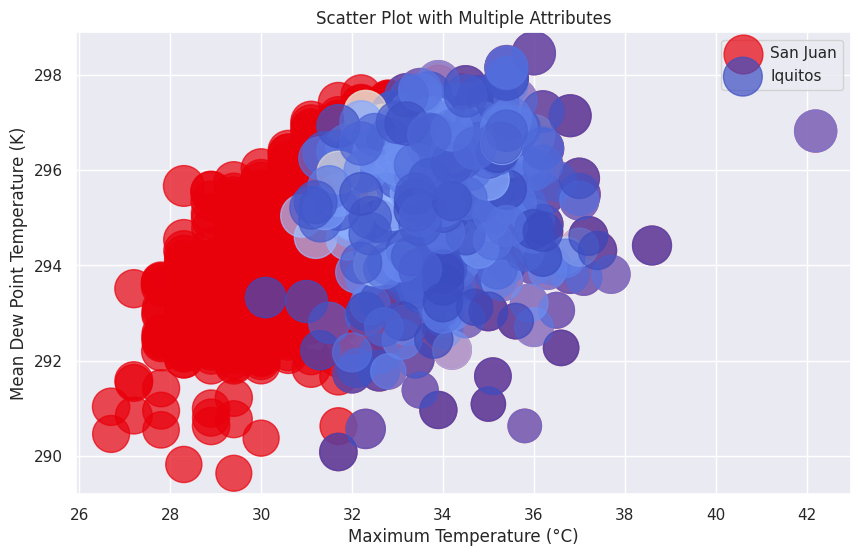

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset into a DataFrame


# Filter data for San Juan
df_sj = df[df['city'] == 'sj']

# Filter data for Iquitos
df_iq = df[df['city'] == 'iq']

# Create a scatter plot with multiple attributes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Maximum Temperature vs. Mean Dew Point Temperature
ax.scatter(df['station_max_temp_c'], df['reanalysis_dew_point_temp_k'],
           c='r', s=df['reanalysis_relative_humidity_percent']*10,
           cmap='coolwarm', alpha=0.7, label='San Juan')

ax.scatter(df_iq['station_max_temp_c'], df_iq['reanalysis_dew_point_temp_k'],
           c=df_iq['station_precip_mm'], s=df_iq['reanalysis_relative_humidity_percent']*10,
           cmap='coolwarm', alpha=0.7, label='Iquitos')

# Set plot labels and titles
ax.set_xlabel('Maximum Temperature (°C)')
ax.set_ylabel('Mean Dew Point Temperature (K)')
ax.set_title('Scatter Plot with Multiple Attributes')

# Add colorbar
#cbar = plt.colorbar(label='Total Precipitation (mm)')

# Add legend
ax.legend()

# Show the plot
plt.show()




In [63]:

# import pandas as pd
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# # Read the dataset into a DataFrame


# # Select the attributes for the 3D scatter plot
# x = df['station_max_temp_c']
# y = df['precipitation_amt_mm']
# z = df['reanalysis_relative_humidity_percent']

# # Create a 3D scatter plot
# fig = plt.figure(figsize=(20, 15))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(x, y, z, c=z, cmap='coolwarm')
# ax.set_xlabel('Maximum Temperature (°C)')
# ax.set_ylabel('Total Precipitation (mm)')
# ax.set_zlabel('Relative Humidity (%)')
# ax.set_title('Relationship between Temperature, Precipitation, and Humidity')
# plt.show()


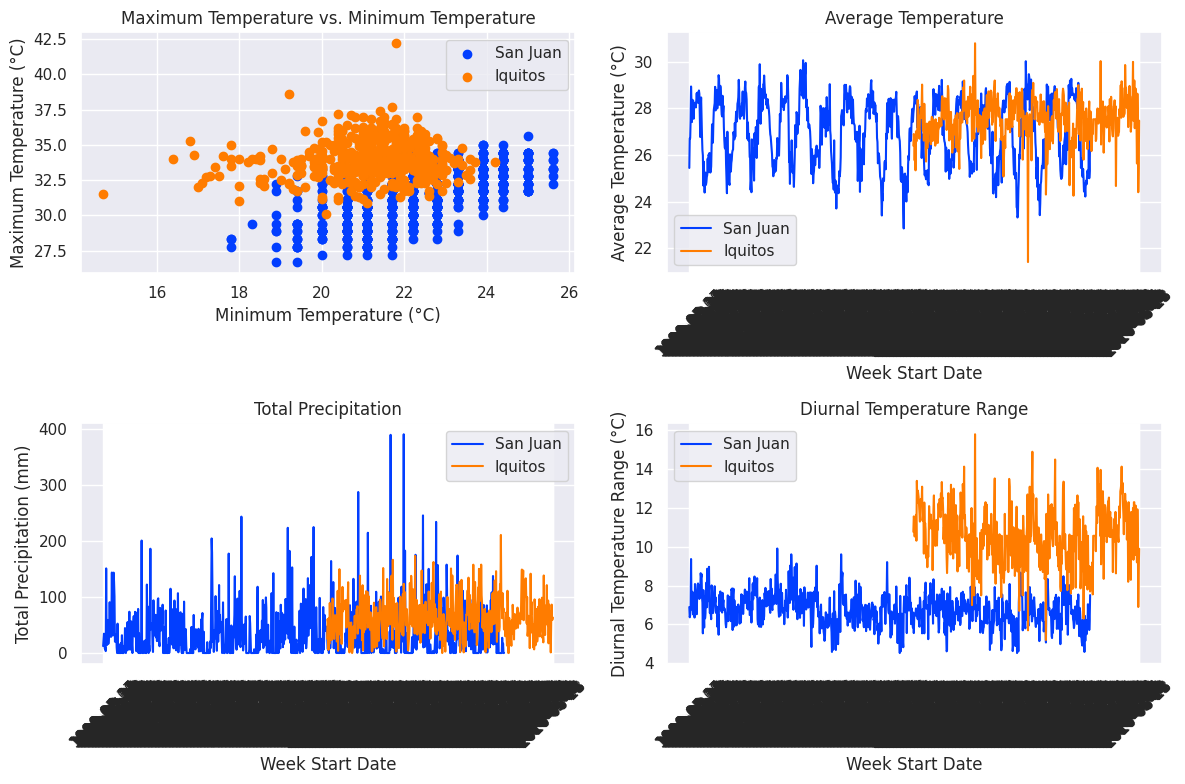

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset into a DataFrame


# Filter data for San Juan
df_sj = df[df['city'] == 'sj']

# Filter data for Iquitos
df_iq = df[df['city'] == 'iq']

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Subplot 1: Maximum Temperature vs. Minimum Temperature
axes[0, 0].scatter(df_sj['station_min_temp_c'], df_sj['station_max_temp_c'], label='San Juan')
axes[0, 0].scatter(df_iq['station_min_temp_c'], df_iq['station_max_temp_c'], label='Iquitos')
axes[0, 0].set_xlabel('Minimum Temperature (°C)')
axes[0, 0].set_ylabel('Maximum Temperature (°C)')
axes[0, 0].set_title('Maximum Temperature vs. Minimum Temperature')
axes[0, 0].legend()

# Subplot 2: Average Temperature
axes[0, 1].plot(df_sj['week_start_date'], df_sj['station_avg_temp_c'], label='San Juan')
axes[0, 1].plot(df_iq['week_start_date'], df_iq['station_avg_temp_c'], label='Iquitos')
axes[0, 1].set_xlabel('Week Start Date')
axes[0, 1].set_ylabel('Average Temperature (°C)')
axes[0, 1].set_title('Average Temperature')
axes[0, 1].legend()
axes[0, 1].tick_params(axis='x', rotation=45)

# Subplot 3: Total Precipitation
axes[1, 0].plot(df_sj['week_start_date'], df_sj['precipitation_amt_mm'], label='San Juan')
axes[1, 0].plot(df_iq['week_start_date'], df_iq['precipitation_amt_mm'], label='Iquitos')
axes[1, 0].set_xlabel('Week Start Date')
axes[1, 0].set_ylabel('Total Precipitation (mm)')
axes[1, 0].set_title('Total Precipitation')
axes[1, 0].legend()
axes[1, 0].tick_params(axis='x', rotation=45)

# Subplot 4: Diurnal Temperature Range
axes[1, 1].plot(df_sj['week_start_date'], df_sj['station_diur_temp_rng_c'], label='San Juan')
axes[1, 1].plot(df_iq['week_start_date'], df_iq['station_diur_temp_rng_c'], label='Iquitos')
axes[1, 1].set_xlabel('Week Start Date')
axes[1, 1].set_ylabel('Diurnal Temperature Range (°C)')
axes[1, 1].set_title('Diurnal Temperature Range')
axes[1, 1].legend()
axes[1, 1].tick_params(axis='x', rotation=45)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

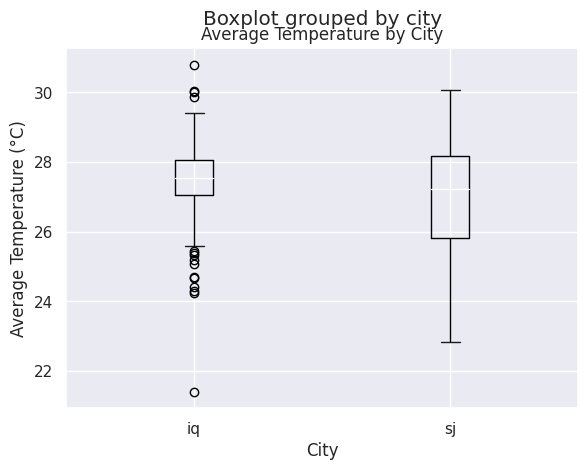

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset into a DataFrame


# Box plot of Average Temperature for each City
df.boxplot(column='station_avg_temp_c', by='city')
plt.xlabel('City')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Temperature by City')
plt.show()


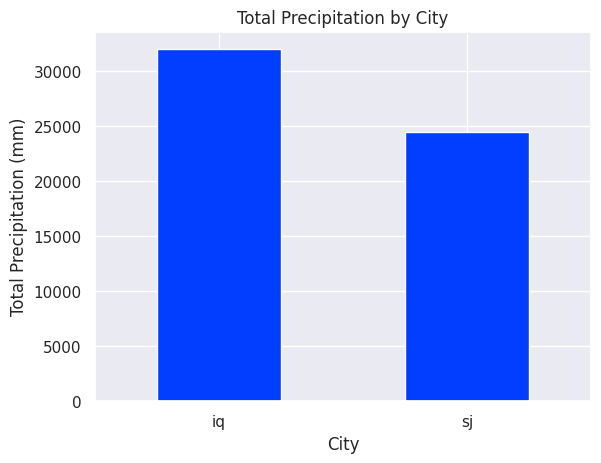

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Group data by city and calculate total precipitation
total_precipitation = df.groupby('city')['station_precip_mm'].sum()

# Bar plot of Total Precipitation for each City
total_precipitation.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Total Precipitation (mm)')
plt.title('Total Precipitation by City')
plt.xticks(rotation=0)
plt.show()


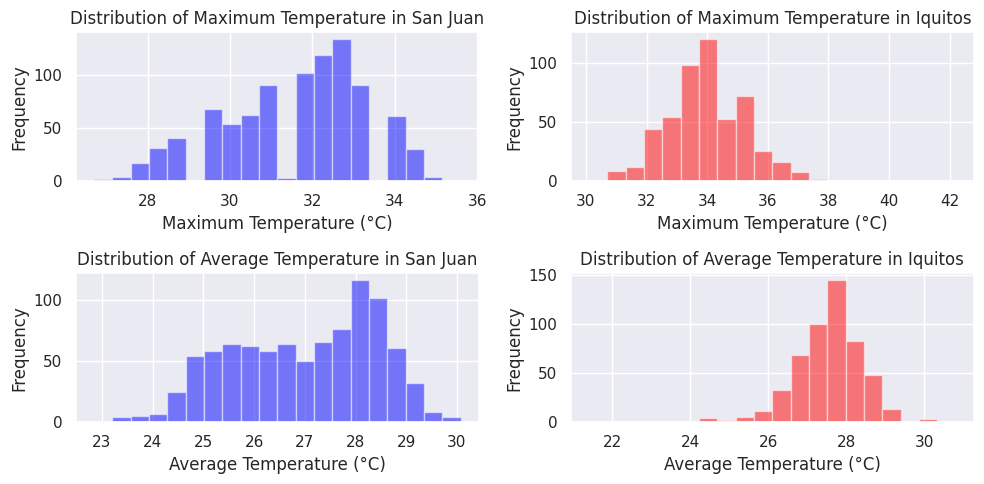

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Plotting Maximum Temperature (station_max_temp_c) for both cities
plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
plt.hist(df[df['city'] == 'sj']['station_max_temp_c'], bins=20, color='blue', alpha=0.5)
plt.xlabel('Maximum Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Distribution of Maximum Temperature in San Juan')

plt.subplot(2, 2, 2)
plt.hist(df[df['city'] == 'iq']['station_max_temp_c'], bins=20, color='red', alpha=0.5)
plt.xlabel('Maximum Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Distribution of Maximum Temperature in Iquitos')

# Plotting Average Temperature (station_avg_temp_c) for both cities
plt.subplot(2, 2, 3)
plt.hist(df[df['city'] == 'sj']['station_avg_temp_c'], bins=20, color='blue', alpha=0.5)
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Distribution of Average Temperature in San Juan')

plt.subplot(2, 2, 4)
plt.hist(df[df['city'] == 'iq']['station_avg_temp_c'], bins=20, color='red', alpha=0.5)
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Distribution of Average Temperature in Iquitos')

plt.tight_layout()
plt.show()


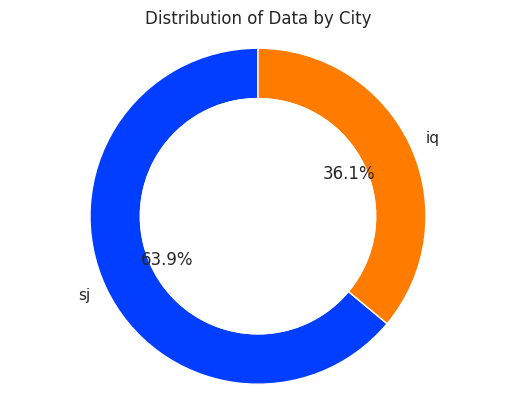

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt



# Group the data by city
city_counts = df['city'].value_counts()

# Create a donut pie chart
fig, ax = plt.subplots()
ax.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
ax.set_title('Distribution of Data by City')

# Add a circle in the middle to create a donut shape
circle = plt.Circle((0, 0), 0.7, color='white')
ax.add_artist(circle)

# Display the chart
plt.axis('equal')
plt.show()


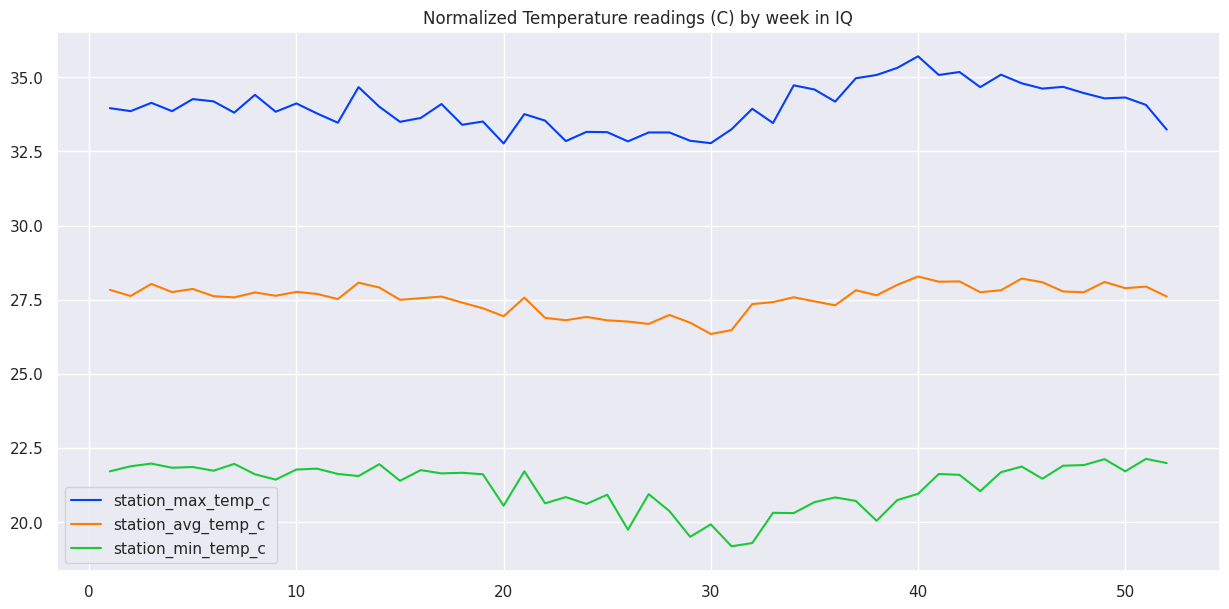

In [ ]:
plt.figure(figsize=[15,7])
plt.title('Normalized Temperature readings (C) by week in IQ')
for i in ['station_max_temp_c','station_avg_temp_c','station_min_temp_c']:
    plt.plot(dfiq.groupby('weekofyear')[i].mean(),label=i)
plt.legend()
plt.show()

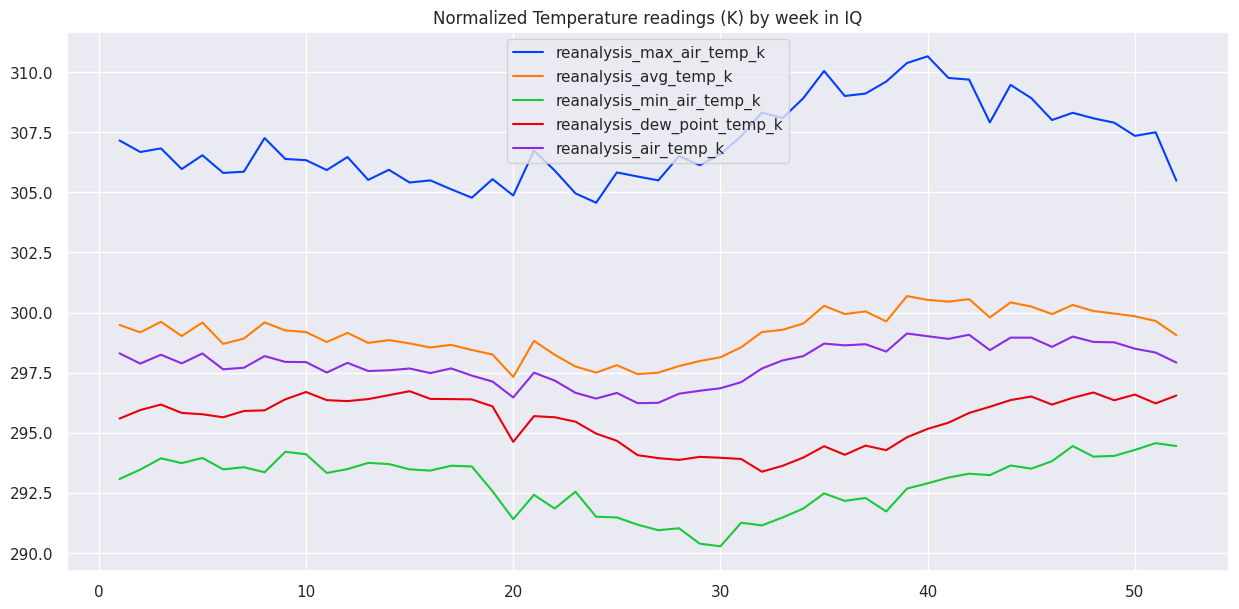

In [ ]:
plt.figure(figsize=[15,7])
plt.title('Normalized Temperature readings (K) by week in IQ')
for i in ['reanalysis_max_air_temp_k',
            'reanalysis_avg_temp_k',
            'reanalysis_min_air_temp_k',
            'reanalysis_dew_point_temp_k',
            'reanalysis_air_temp_k',]:
    plt.plot(dfiq.groupby('weekofyear')[i].mean(),label=i)
plt.legend()
plt.show()

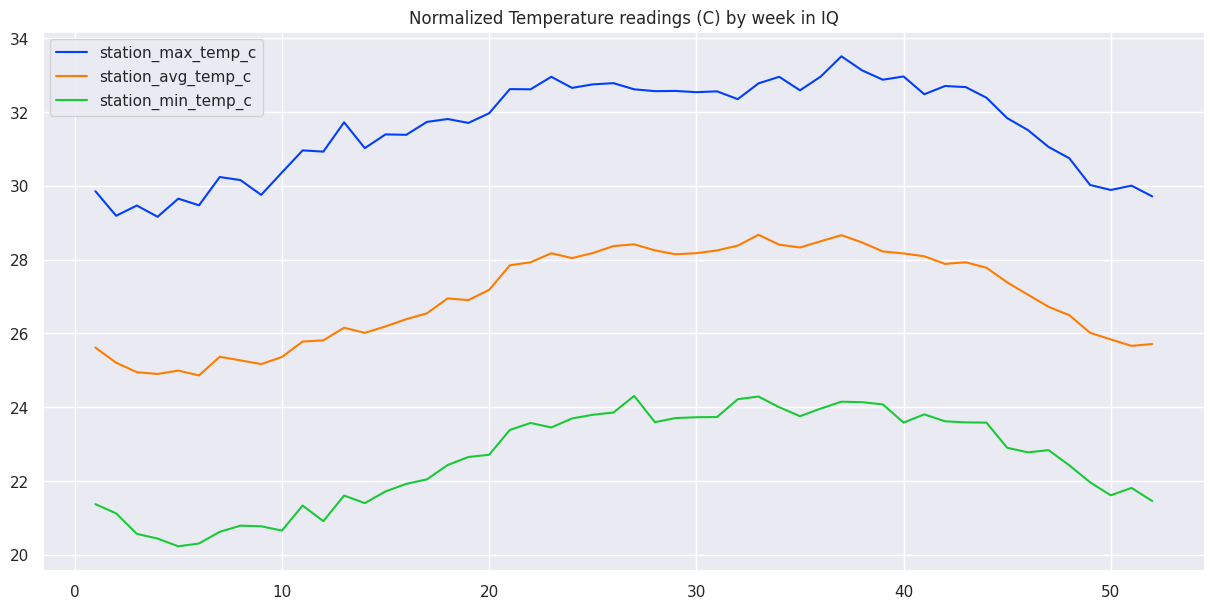

In [ ]:
plt.figure(figsize=[15,7])
plt.title('Normalized Temperature readings (C) by week in IQ')
for i in ['station_max_temp_c','station_avg_temp_c','station_min_temp_c']:
    plt.plot(dfsj.groupby('weekofyear')[i].mean(),label=i)
plt.legend()
plt.show()

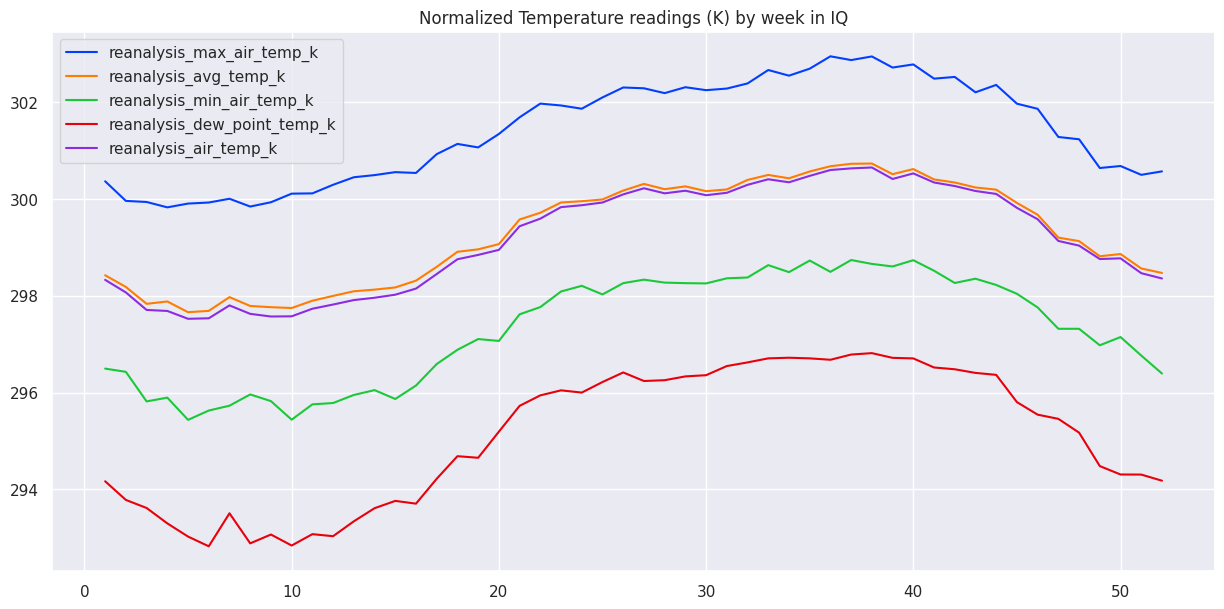

In [ ]:
plt.figure(figsize=[15,7])
plt.title('Normalized Temperature readings (K) by week in IQ')
for i in ['reanalysis_max_air_temp_k',
            'reanalysis_avg_temp_k',
            'reanalysis_min_air_temp_k',
            'reanalysis_dew_point_temp_k',
            'reanalysis_air_temp_k',]:
    plt.plot(dfsj.groupby('weekofyear')[i].mean(),label=i)
plt.legend()
plt.show()

In [ ]:
#pip install pandas-profiling[notebook,html]

In [ ]:
#import pandas_profiling
#import pandas as pd
#report=pandas_profiling.ProfileReport(df)
#report.to_file('report.html')

In [ ]:
# from pandas.plotting import scatter_matrix


# scatter_matrix(dfsj, alpha=0.1, figsize=(50, 50), diagonal="kde");

In [ ]:
# scatter_matrix(dfiq, alpha=0.1, figsize=(50, 50), diagonal="kde")

<Figure size 1000x600 with 0 Axes>

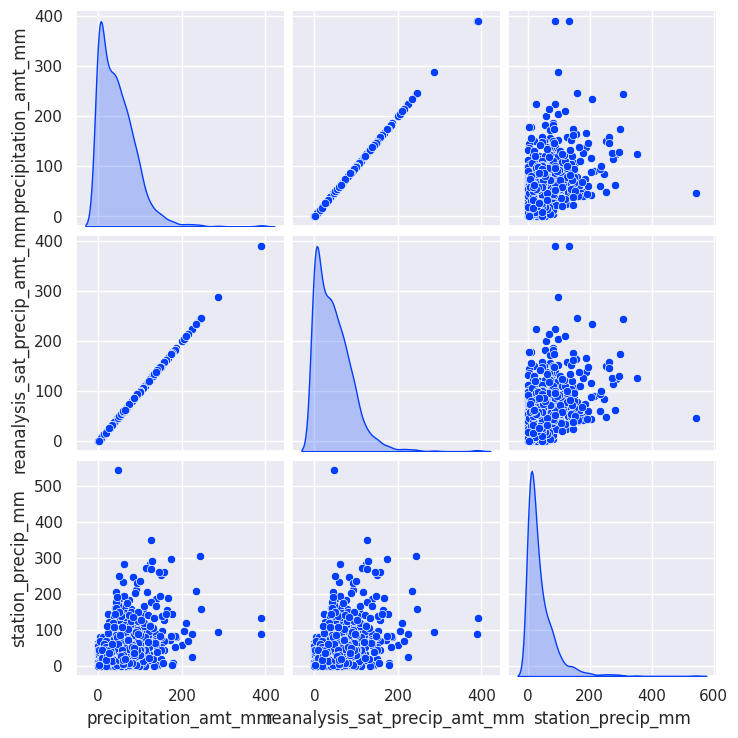

In [ ]:
plt.figure(figsize=(10, 6))
sns.pairplot(df[["precipitation_amt_mm", "reanalysis_sat_precip_amt_mm", "station_precip_mm"]], diag_kind="kde")

<Figure size 1000x600 with 0 Axes>

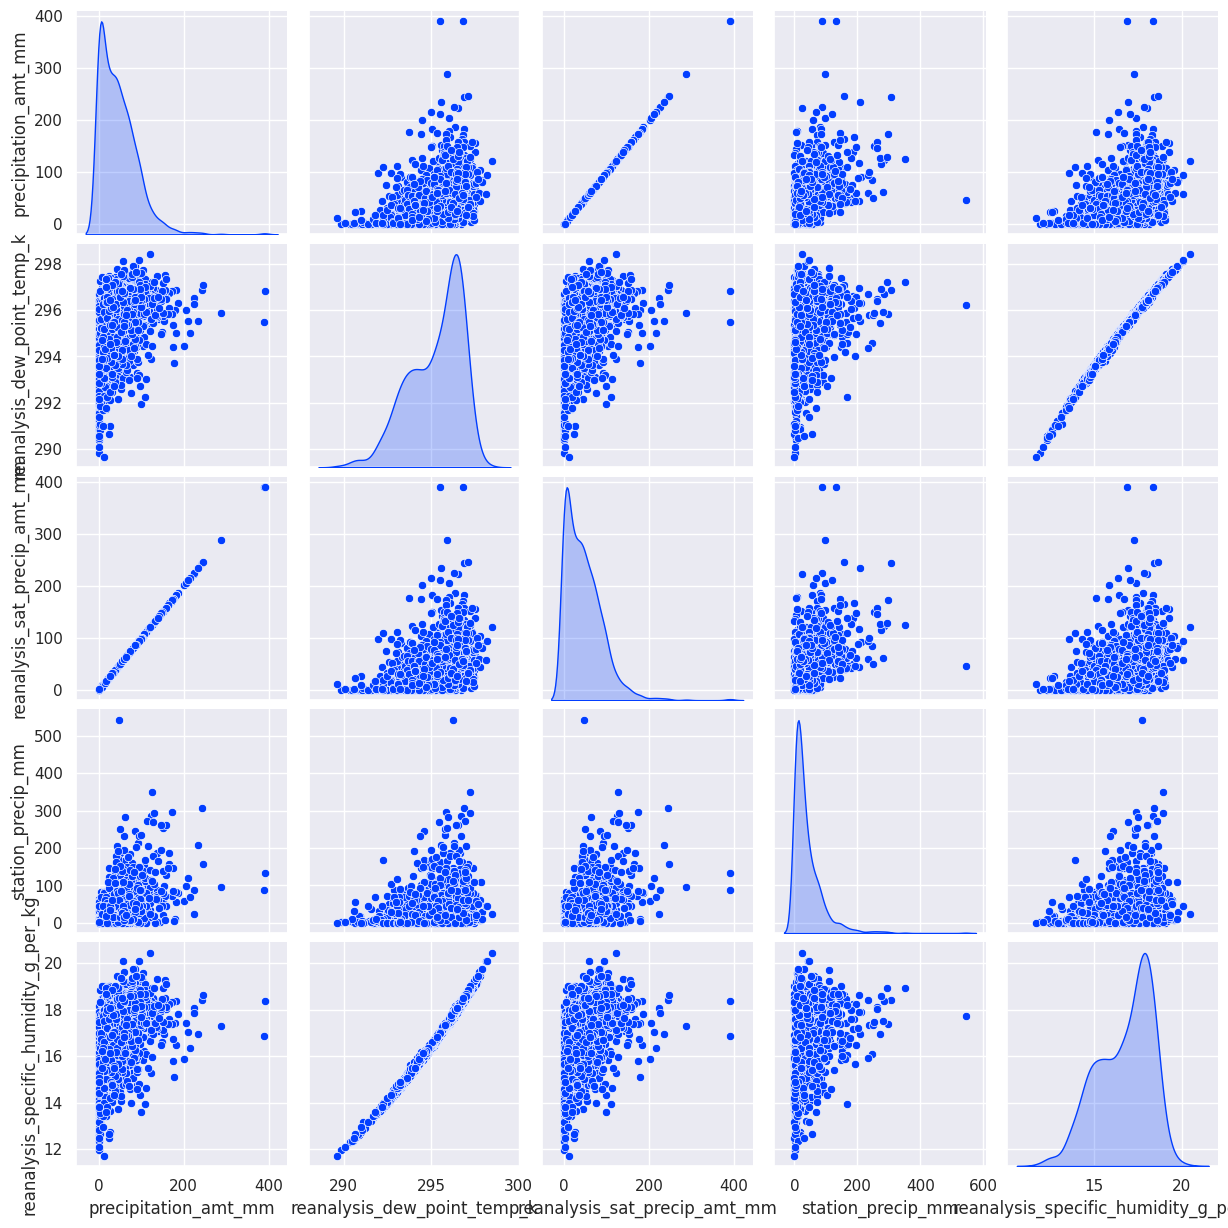

In [ ]:
plt.figure(figsize=(10, 6))
sns.pairplot(df[["precipitation_amt_mm", "reanalysis_dew_point_temp_k","reanalysis_sat_precip_amt_mm", "station_precip_mm","reanalysis_specific_humidity_g_per_kg"]], diag_kind="kde")

In [65]:
df_t=df['total_cases']

In [66]:
df_t

0       4
1       5
2       4
3       3
4       6
       ..
1451    5
1452    8
1453    1
1454    1
1455    4
Name: total_cases, Length: 1434, dtype: int64

In [67]:
df.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases'],
      dtype='object')

In [68]:
x=df[['ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw','reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k','reanalysis_tdtr_k','station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c','reanalysis_air_temp_k', 'station_precip_mm','reanalysis_precip_amt_kg_per_m2']]

In [69]:
x

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_tdtr_k,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,reanalysis_air_temp_k,station_precip_mm,reanalysis_precip_amt_kg_per_m2
0,0.122600,0.103725,0.198483,0.177617,299.8,295.9,2.628571,6.900000,29.4,20.0,297.572857,16.0,32.00
1,0.169900,0.142175,0.162357,0.155486,300.9,296.4,2.371429,6.371429,31.7,22.2,298.211429,8.6,17.94
2,0.032250,0.172967,0.157200,0.170843,300.5,297.3,2.300000,6.485714,32.2,22.8,298.781429,41.4,26.10
3,0.128633,0.245067,0.227557,0.235886,301.4,297.0,2.428571,6.771429,33.3,23.3,298.987143,4.0,13.90
4,0.196200,0.262200,0.251200,0.247340,301.9,297.5,3.014286,9.371429,35.0,23.9,299.518571,5.8,12.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,0.342750,0.318900,0.256343,0.292514,309.7,294.5,9.800000,11.933333,35.4,22.4,299.334286,27.0,45.00
1452,0.160157,0.160371,0.136043,0.225657,308.5,291.9,7.471429,10.500000,34.7,21.7,298.330000,36.6,207.10
1453,0.247057,0.146057,0.250357,0.233714,305.5,292.4,7.500000,6.900000,32.2,19.2,296.598571,7.4,50.60
1454,0.333914,0.245771,0.278886,0.325486,306.1,291.9,7.871429,8.733333,31.2,21.0,296.345714,16.0,62.33


In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,df_t , test_size = 0.2)

In [71]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [72]:
print(model.coef_)

[-3.14954929e+00  3.14682513e+01 -1.09207379e+01 -5.71149271e+00
  3.36259042e-01 -1.07544190e+00 -2.89482312e+00 -7.24137763e-01
 -1.87984914e-01  2.12079773e-01  6.44192211e+00 -1.36969840e-02
  3.79263484e-02]


In [73]:
pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])

,Coeff
ndvi_ne,-3.149549
ndvi_nw,31.468251
ndvi_se,-10.920738
ndvi_sw,-5.711493
reanalysis_max_air_temp_k,0.336259
reanalysis_min_air_temp_k,-1.075442
reanalysis_tdtr_k,-2.894823
station_diur_temp_rng_c,-0.724138
station_max_temp_c,-0.187985
station_min_temp_c,0.212080


In [74]:
predictions = model.predict(x_test)


In [75]:
from sklearn.metrics import r2_score
score1=r2_score(predictions,y_test)
print(score1)

-5.332858992527265


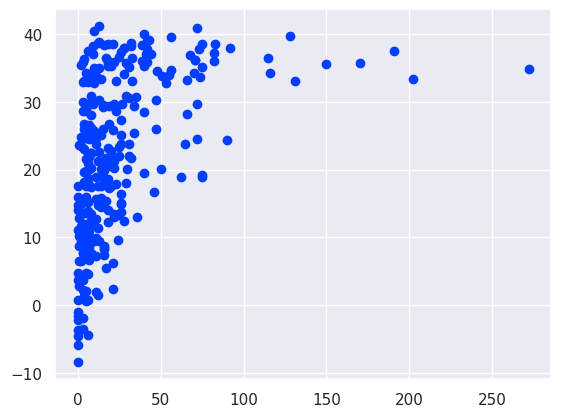

In [76]:
plt.scatter(y_test, predictions)


(array([112., 138.,  24.,   4.,   4.,   1.,   2.,   1.,   0.,   1.]),
 array([-33.34704349,  -6.29791193,  20.75121963,  47.80035119,
         74.84948275, 101.89861431, 128.94774587, 155.99687743,
        183.04600899, 210.09514055, 237.14427211]),
 <BarContainer object of 10 artists>)

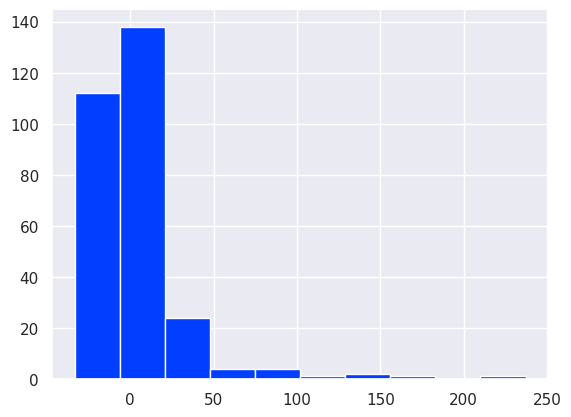

In [77]:
plt.hist(y_test - predictions)

<Axes: xlabel='total_cases', ylabel='Density'>

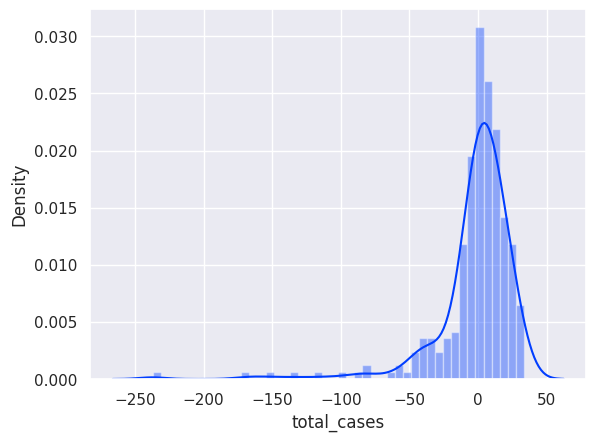

In [78]:
sns.distplot(predictions-y_test)

In [79]:
from sklearn import metrics
metrics.mean_absolute_error(y_test, predictions)
# metrics.mean_squared_error(y_test, predictions)
# np.sqrt(metrics.mean_squared_error(y_test, predictions))


16.87341765392646

<Axes: >

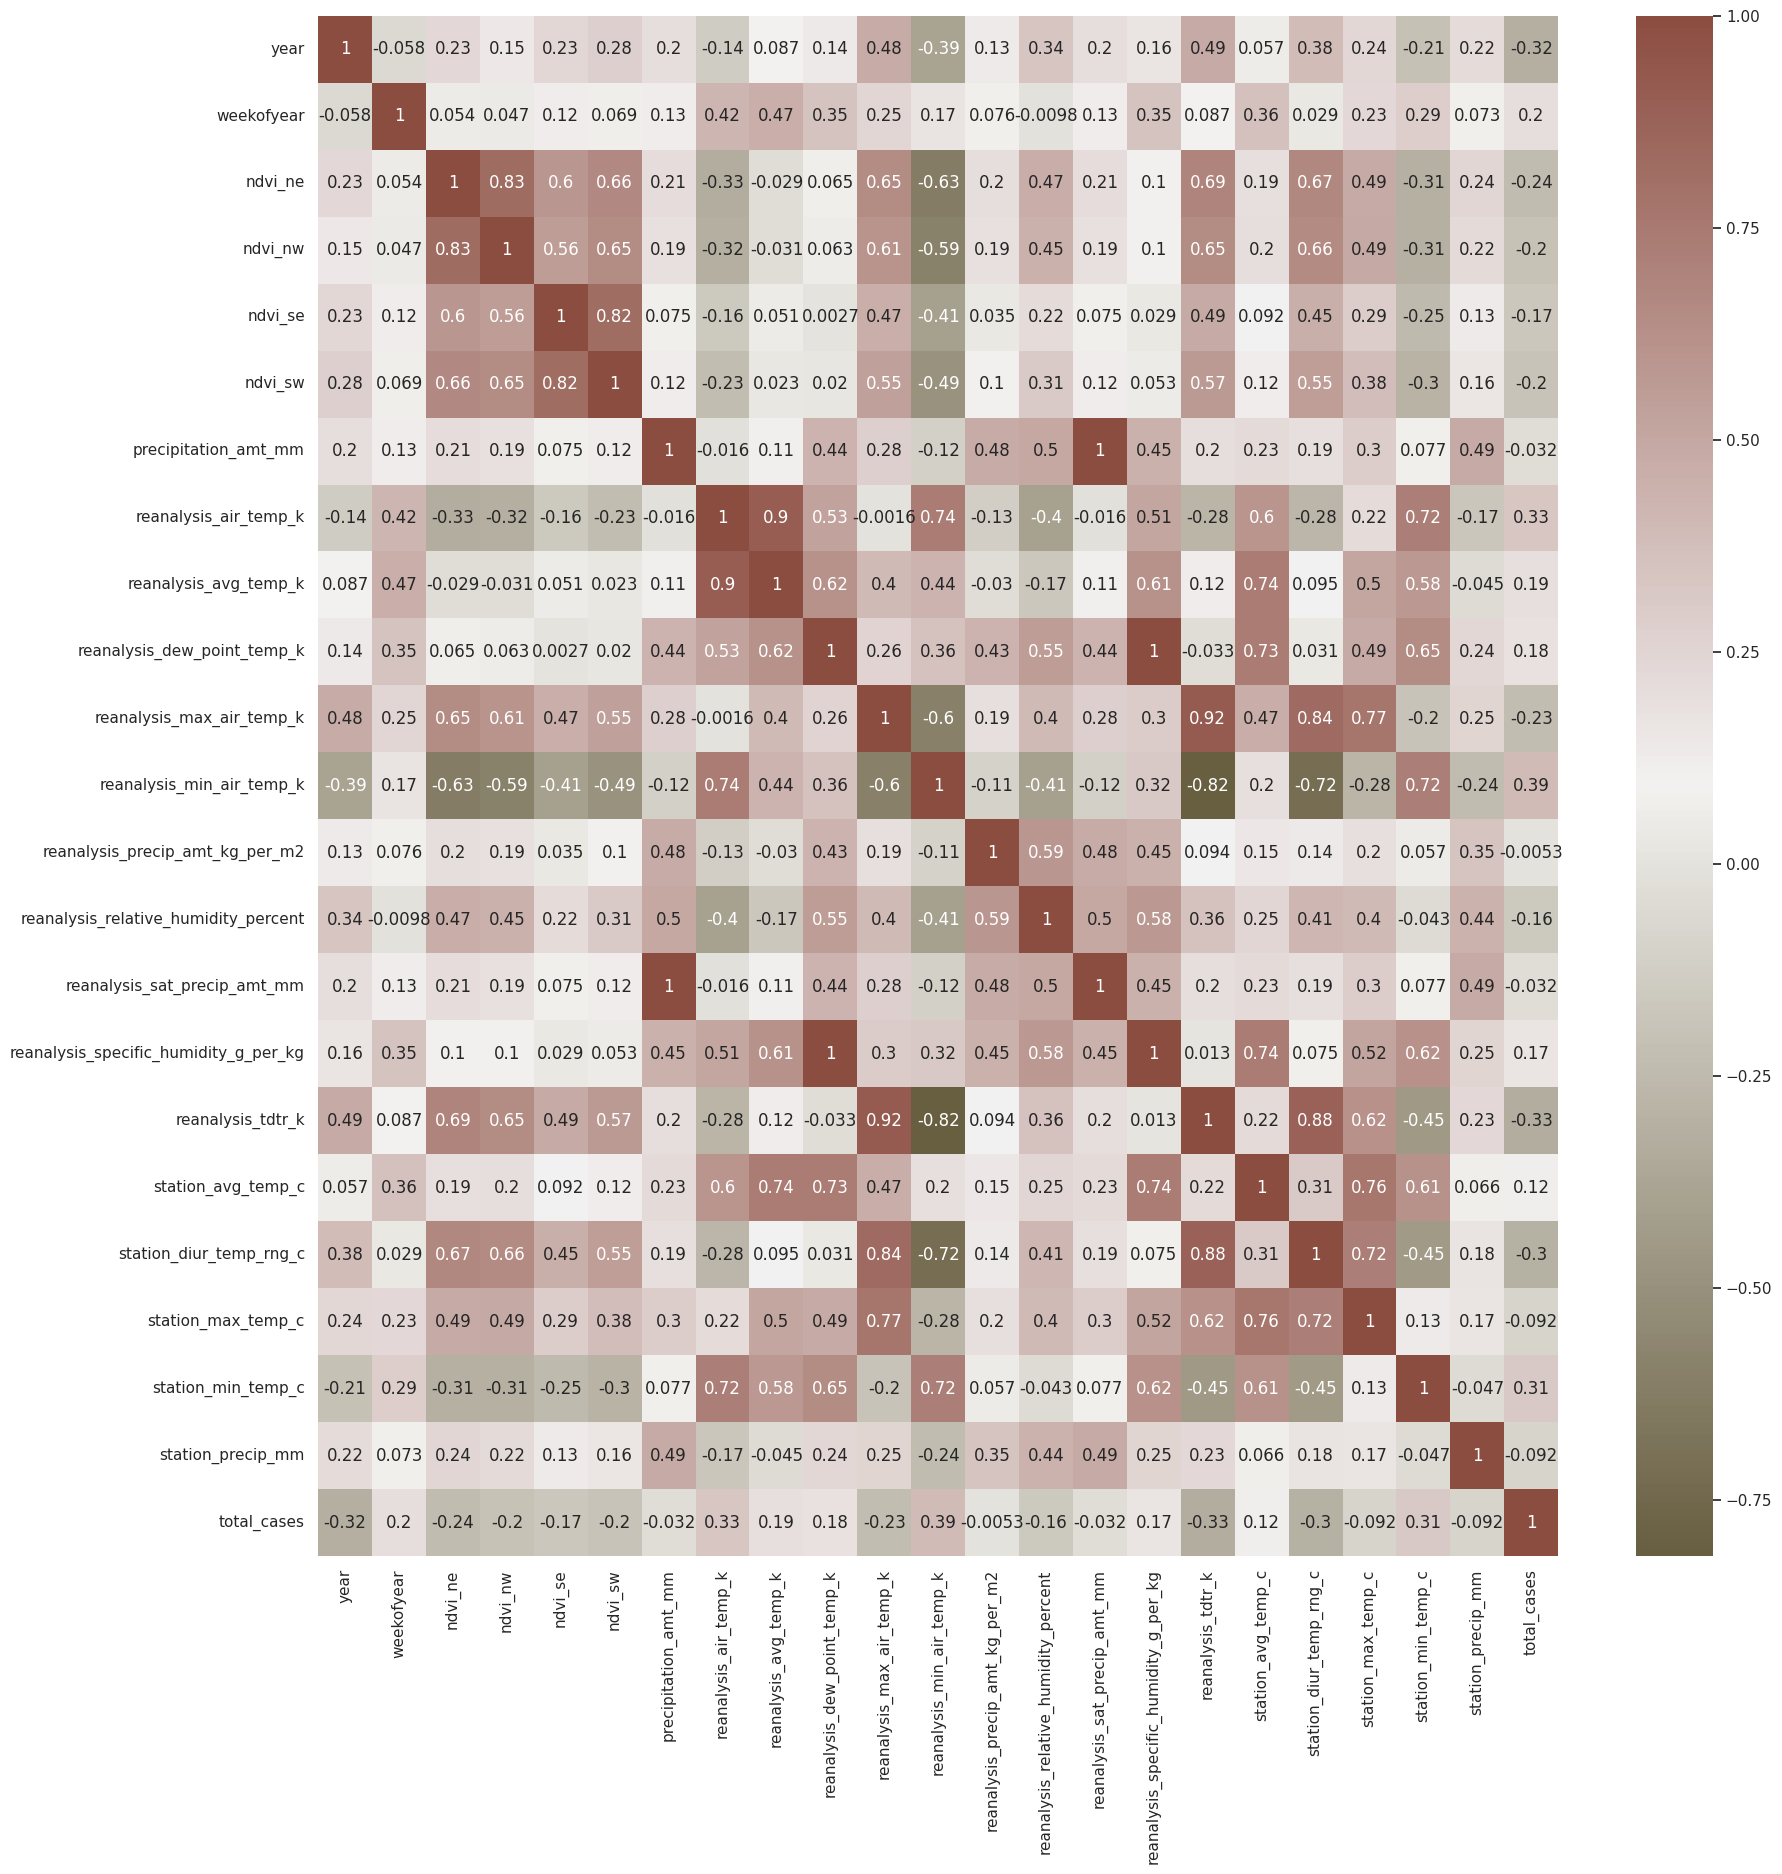

In [ ]:
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= df.corr()
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score



# Select the relevant attributes for prediction
features = ['station_max_temp_c', 'station_min_temp_c', 'station_avg_temp_c',
            'station_precip_mm', 'station_diur_temp_rng_c', 'precipitation_amt_mm',
            'reanalysis_sat_precip_amt_mm', 'reanalysis_dew_point_temp_k',
            'reanalysis_air_temp_k', 'reanalysis_relative_humidity_percent',
            'reanalysis_specific_humidity_g_per_kg', 'reanalysis_precip_amt_kg_per_m2',
            'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
            'reanalysis_avg_temp_k', 'reanalysis_tdtr_k', 'ndvi_se', 'ndvi_sw',
            'ndvi_ne', 'ndvi_nw']

# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(df[features], df['total_cases'], test_size=0.2, random_state=42)

# # Create a linear regression model
model = LinearRegression()

# # Train the model
model.fit(train_data, train_labels)

# # Make predictions on the test set
predictions = model.predict(test_data)

score1=r2_score(predictions,y_test)
print(score1)


-5.972141705722454


In [ ]:
df_sj=dfsj
df_sj.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [ ]:
import pandas as pd
import numpy as np
import time as time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error
%matplotlib inline

In [ ]:
# df_sj['ndvi_mean'] = (df_sj['ndvi_ne'] + df_sj['ndvi_nw'] + df_sj['ndvi_se'] + df_sj['ndvi_sw']) / 4.0
# #df_iq['ndvi_mean'] = (df_iq['ndvi_ne'] + df_iq['ndvi_nw'] + df_iq['ndvi_se'] + df_iq['ndvi_sw']) / 4.0

In [ ]:
# # scale the data and create features as discussed in the EDA notebook.
# ss = StandardScaler()
# Xs = ss.fit_transform(df_sj[df_sj.columns[4:24]])
# df_sj_s = pd.DataFrame(Xs, columns = df_sj.columns[4:24], index=df_sj.index)
# df_sj_s['week_start_date'] = df_sj['week_start_date']
# df_sj_s['weekofyear'] = df_sj['weekofyear']
# df_sj_s['month'] = df_sj_s.week_start_date.dt.month
# df_sj_s['year'] = df_sj_s.week_start_date.dt.year
# sj_train = df_sj_s[df_sj_s.week_start_date.dt.year <= 2002].drop('total_cases', axis=1)
# sj_train_target = df_sj[df_sj.week_start_date.dt.year <= 2002].total_cases

# sj_valid = df_sj_s[df_sj_s.week_start_date.dt.year > 2002].drop('total_cases', axis=1)
# sj_valid_target = df_sj[df_sj.week_start_date.dt.year > 2002].total_cases

# sj_train.drop('week_start_date', axis=1, inplace=True)
# sj_valid.drop('week_start_date', axis=1, inplace=True)

# print('Total:', df_sj.shape)
# print('Train:', sj_train.shape)
# print('Valid:', sj_valid.shape)
# print(sj_train.shape[0] + sj_valid.shape[0])

In [89]:
# importing libraries
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# loading boston dataset
X=df[['ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw','reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k','reanalysis_tdtr_k','station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c','reanalysis_air_temp_k', 'station_precip_mm','reanalysis_precip_amt_kg_per_m2']]
y = df_t


# scaling the inputs
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

# Train Test split will be used for both models
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y,
													test_size = 0.3)

# training model with 0.5 alpha value
model = Ridge(alpha = 0.5,  tol = 0.001, \
			solver ='auto', random_state = 42)
model.fit(X_train, y_train)

# predicting the y_test
y_pred = model.predict(X_test)

# finding score for our model
score = model.score(X_test, y_test)
print("\nModel score : ", score)

score1=r2_score(y_pred,y_test)
print("\nR2 score : ",score1)


Model score :  0.16333842091157547

R2 score :  -3.7033743143726703


We have used ridge regression for the Deng AI dataset

In [ ]:
# vegs =dfiq['ndvi_ne','ndvi_nw','ndvi_se', 'ndvi_sw']
# plt.figure(figsize=[15,5])
# for i,col in enumerate(vegs[1:]):
#     plt.subplot(1,4,i+1)
#     sns.regplot(dfiq.total_cases, dfiq[col])
# plt.show()

# plt.figure(figsize=[15,5])
# for v in vegs[1:]:
#     plt.plot(dfiq.groupby('weekofyear')[v].mean(),
#             label=v)
# plt.show()

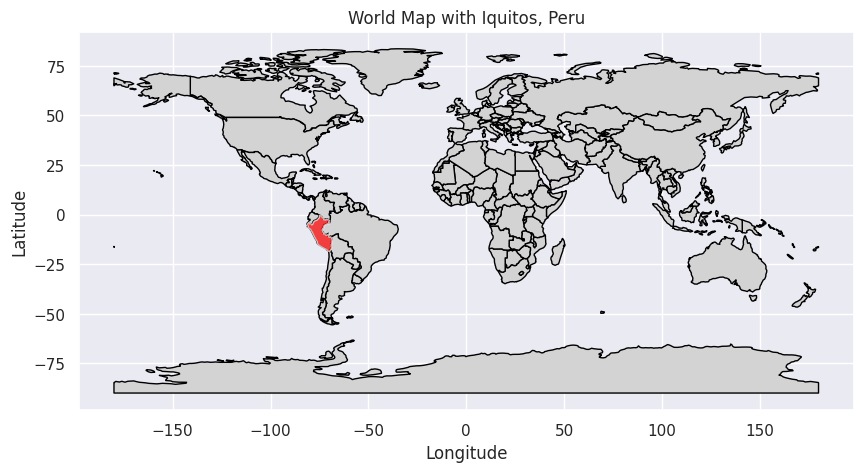

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Read the world map dataset from geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the dataset to include only the city of Iquitos
iquitos_lon, iquitos_lat = -73.2472, -3.7437  # Iquitos coordinates (longitude, latitude)
iquitos = gpd.GeoSeries([Point(iquitos_lon, iquitos_lat)], crs='EPSG:4326')
iquitos = gpd.GeoDataFrame(geometry=iquitos)
iquitos = gpd.sjoin(world, iquitos, how='inner', op='intersects')

# Plot the world map and Iquitos
fig, ax = plt.subplots(figsize=(10, 10))

world.plot(ax=ax, color='lightgray', edgecolor='black')
iquitos.plot(ax=ax, color='red', alpha=0.7, markersize=100)

# Set the plot title and axis labels
ax.set_title('World Map with Iquitos, Peru')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()


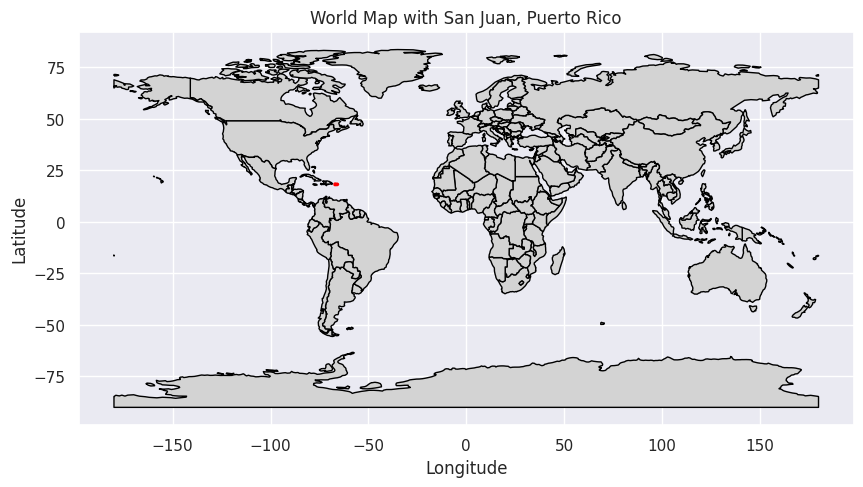

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Read the world map dataset from geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the dataset to include only the city of San Juan
san_juan_lon, san_juan_lat = -66.1057, 18.4655  # San Juan coordinates (longitude, latitude)
san_juan = gpd.GeoSeries([Point(san_juan_lon, san_juan_lat)], crs='EPSG:4326')
san_juan = gpd.GeoDataFrame(geometry=san_juan)
san_juan = gpd.sjoin(world, san_juan, how='inner', op='intersects')

# Plot the world map and San Juan
fig, ax = plt.subplots(figsize=(10, 10))

world.plot(ax=ax, color='lightgray', edgecolor='black')
san_juan.boundary.plot(ax=ax, color='red', linewidth=2.0)

# Set the plot title and axis labels
ax.set_title('World Map with San Juan, Puerto Rico')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()


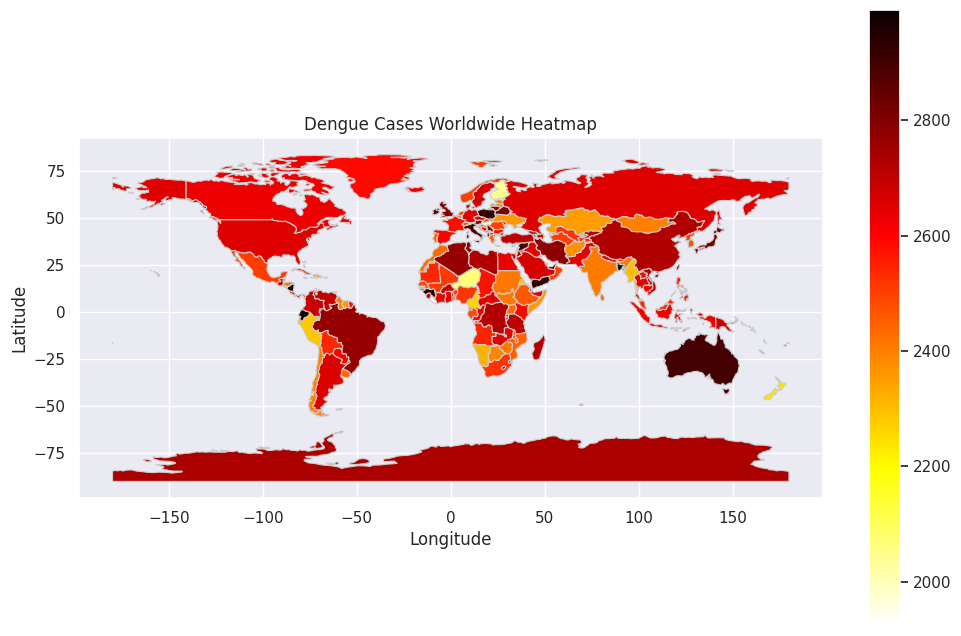

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# Load the world shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create random data for the number of dengue cases in each country
np.random.seed(42)  # For reproducibility
num_countries = len(world)
num_weeks = 52
cases = np.random.randint(low=0, high=100, size=(num_countries, num_weeks))

# Create a GeoDataFrame with the data
world_cases = world.copy()
world_cases['Cases'] = cases.sum(axis=1)

# Plot the world map with a heatmap
fig, ax = plt.subplots(figsize=(12, 8))

world_cases.plot(column='Cases', cmap='hot_r', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add title and labels
ax.set_title('Dengue Cases Worldwide Heatmap')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()


<Figure size 1000x600 with 0 Axes>

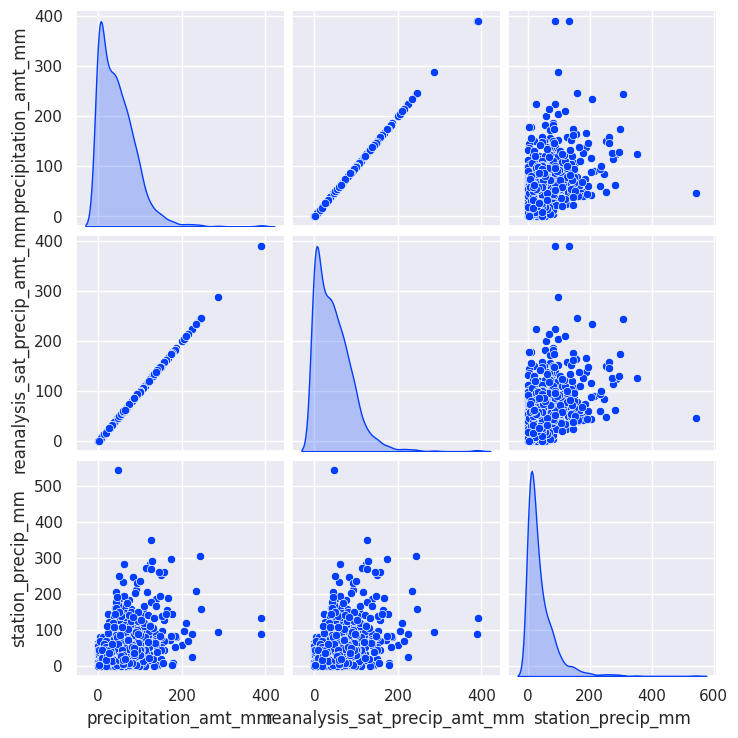

In [ ]:
plt.figure(figsize=(10, 6))
sns.pairplot(df[["precipitation_amt_mm", "reanalysis_sat_precip_amt_mm", "station_precip_mm"]], diag_kind="kde")

In [ ]:
df.columns


Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases'],
      dtype='object')

In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score



# Select the relevant attributes for prediction
features = ['station_max_temp_c', 'station_min_temp_c', 'station_avg_temp_c',
            'station_precip_mm', 'station_diur_temp_rng_c', 'precipitation_amt_mm',
            'reanalysis_sat_precip_amt_mm', 'reanalysis_dew_point_temp_k',
            'reanalysis_air_temp_k', 'reanalysis_relative_humidity_percent',
            'reanalysis_specific_humidity_g_per_kg', 'reanalysis_precip_amt_kg_per_m2',
            'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
            'reanalysis_avg_temp_k', 'reanalysis_tdtr_k', 'ndvi_se', 'ndvi_sw',
            'ndvi_ne', 'ndvi_nw']

# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(df[features], df['total_cases'], test_size=0.2, random_state=42)

# # Create a linear regression model
model = LinearRegression()

# # Train the model
model.fit(train_data, train_labels)

# # Make predictions on the test set
predictions = model.predict(test_data)

score1=r2_score(predictions,test_labels)
print(score1)


-2.875537447769226


In [93]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
s_df=scaler.fit_transform(x)

In [98]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(s_df, df['total_cases'], test_size=0.2, random_state=42)

# # Create a linear regression model
model = LinearRegression()

# # Train the model
model.fit(train_data, train_labels)

# # Make predictions on the test set
predictions = model.predict(test_data)

score1=r2_score(predictions,test_labels)
print(score1)


-2.9554336473356697


In [107]:
x

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_tdtr_k,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,reanalysis_air_temp_k,station_precip_mm,reanalysis_precip_amt_kg_per_m2
0,0.122600,0.103725,0.198483,0.177617,299.8,295.9,2.628571,6.900000,29.4,20.0,297.572857,16.0,32.00
1,0.169900,0.142175,0.162357,0.155486,300.9,296.4,2.371429,6.371429,31.7,22.2,298.211429,8.6,17.94
2,0.032250,0.172967,0.157200,0.170843,300.5,297.3,2.300000,6.485714,32.2,22.8,298.781429,41.4,26.10
3,0.128633,0.245067,0.227557,0.235886,301.4,297.0,2.428571,6.771429,33.3,23.3,298.987143,4.0,13.90
4,0.196200,0.262200,0.251200,0.247340,301.9,297.5,3.014286,9.371429,35.0,23.9,299.518571,5.8,12.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,0.342750,0.318900,0.256343,0.292514,309.7,294.5,9.800000,11.933333,35.4,22.4,299.334286,27.0,45.00
1452,0.160157,0.160371,0.136043,0.225657,308.5,291.9,7.471429,10.500000,34.7,21.7,298.330000,36.6,207.10
1453,0.247057,0.146057,0.250357,0.233714,305.5,292.4,7.500000,6.900000,32.2,19.2,296.598571,7.4,50.60
1454,0.333914,0.245771,0.278886,0.325486,306.1,291.9,7.871429,8.733333,31.2,21.0,296.345714,16.0,62.33


In [174]:
# importing libraries
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import GridSearchCV

# Perform feature selection using SelectKBest with f_regression scoring
selector = SelectKBest(score_func=f_regression, k=10)
X_selected = selector.fit_transform(x, y)


# Train Test split will be used for both models
X_train, X_test, y_train, y_test = train_test_split(X_selected, y,
													test_size = 0.3)

# Define parameter grid for alpha values
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0]}

# Perform grid search to find optimal alpha
ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, scoring='r2')
grid_search.fit(X, y)

# Access the best hyperparameter value and best score
best_alpha = grid_search.best_params_['alpha']
best_score = grid_search.best_score_

print("the best alpha value is : ",best_alpha)

# Create and fit the Ridge regression model with the best alpha
ridge = Ridge(alpha=best_alpha)

ridge.fit(X_train, y_train)

# Predict on the test data
y_pred = ridge.predict(X_test)

# Calculate R2 score on the test data
r2 = r2_score(y_test, y_pred)
print("R2 score on test data:", r2)



the best alpha value is :  10.0
R2 score on test data: 0.18348992917753404
